<a href="https://colab.research.google.com/github/Varunnlad/Data-Analysis-Visualization/blob/master/Cars_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("cars_dataset.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [ ]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0
Make,0


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import pandas as pd


In [16]:
categorical_cols = ["model", "fuelType", "Make"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

In [21]:
print(X_train.dtypes)

model        object
year          int64
mileage       int64
fuelType     object
tax         float64
Make         object
dtype: object


In [37]:
df["model"]=df["model"].astype("category")
df["fuelType"]=df["fuelType"].astype("category")
df["Make"]=df["Make"].astype("category")

In [47]:

X=df[["model","year","mileage","fuelType","tax","Make"]]
y=df["price"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(enable_categorical=True)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

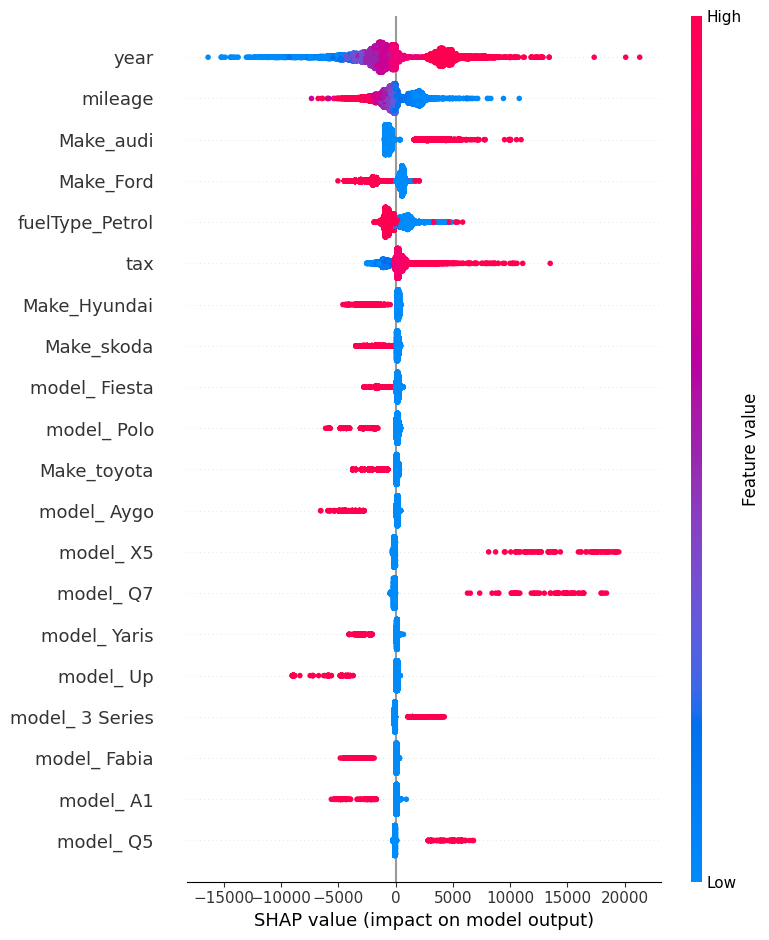

In [48]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [53]:
print(X_test.columns)

Index(['year', 'mileage', 'tax', 'model_ 2 Series', 'model_ 3 Series',
       'model_ 4 Series', 'model_ 5 Series', 'model_ 6 Series',
       'model_ 7 Series', 'model_ 8 Series',
       ...
       'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol', 'Make_Ford', 'Make_Hyundai', 'Make_audi',
       'Make_skoda', 'Make_toyota', 'Make_vw'],
      dtype='object', length=158)


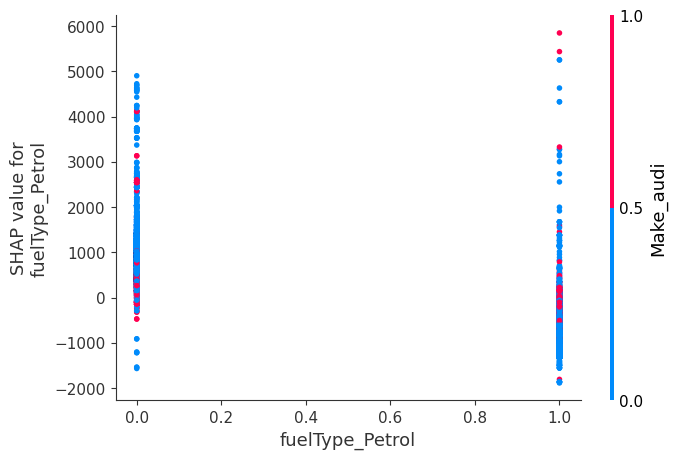

In [54]:
shap.dependence_plot("fuelType_Petrol", shap_values.values, X_test)

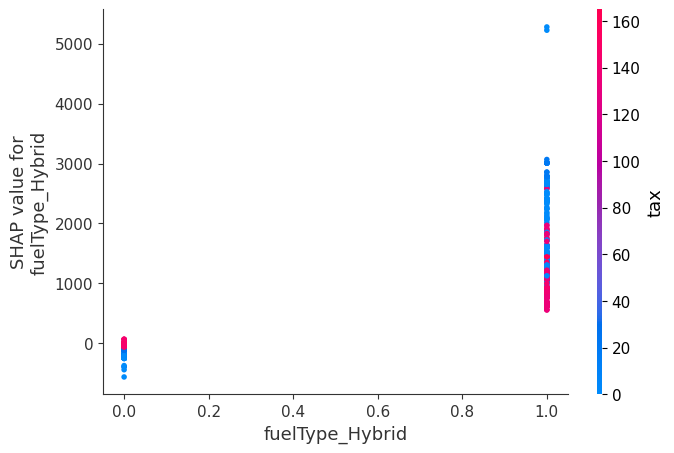

In [55]:
shap.dependence_plot("fuelType_Hybrid", shap_values.values, X_test)

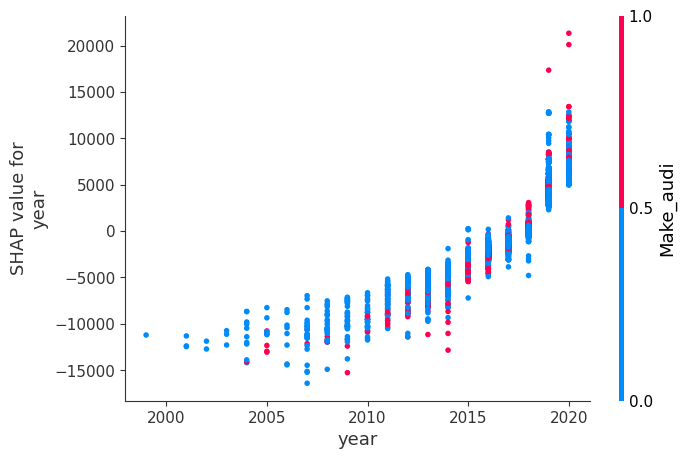

In [56]:
shap.dependence_plot("year", shap_values.values, X_test)

In [57]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])

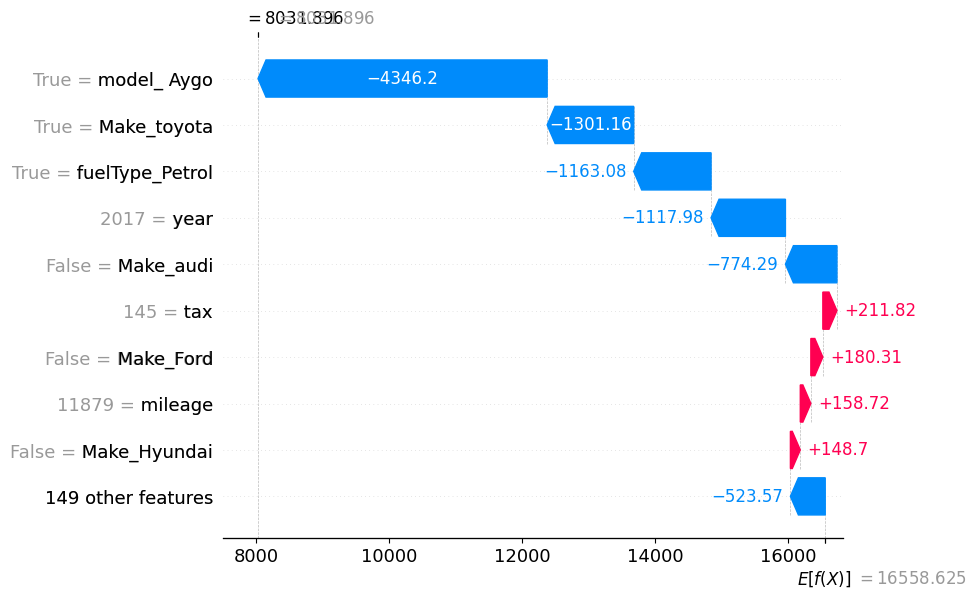

In [58]:
shap.plots.waterfall(shap_values[0])

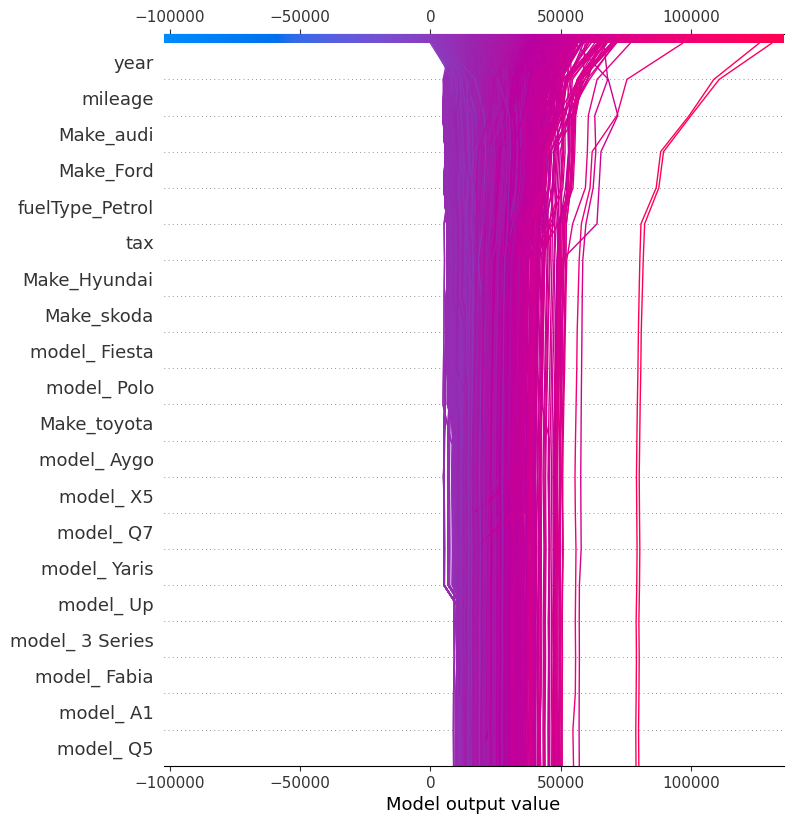

In [60]:
shap.decision_plot(explainer.expected_value, shap_values.values, X_test, ignore_warnings=True)